# Environment

In [16]:
class WaitingNode:
    def __init__(self, id, stoplight = 'red'):
        self.id = id
        self.stoplight = stoplight
        self.queue = []
        
    def __repr__(self):
        return f"WaitingNode{self.id}\nCars: {len(self.queue)}\nStoplight: {self.stoplight}"

class IntersectionNode:
    def __init__(self, id):
        self.id = id
        self.queue = []
        
    def __repr__(self):
        return f"Intersection{self.id}\nCars: {len(self.queue)}"
        
class EndingNode:
    def __init__(self, id):
        self.id = id
        self.queue = []
        
    def __repr__(self):
        return f"Ending{self.id}\nCars: {len(self.queue)}"
    
class Car:
    def __init__(self, id, spawn_time):
        self.id = id
        self.spawn_time = spawn_time
        
    def __repr__(self):
        return f"Car {self.id}"

    def kill(self, kill_time):
        self.waited_time = kill_time - self.spawn_time
        return self.waited_time

# Configuration

In [17]:
import networkx as nx

A = WaitingNode(0)
B = WaitingNode(1)
C = IntersectionNode(2)
D = EndingNode(3)

waiting_nodes = [A, B]

G = nx.DiGraph()
G.add_node(A, pos = (0, 0))
G.add_node(B, pos = (1, 1))
G.add_node(C, pos = (0, 1))
G.add_node(D, pos = (0, 2))
G.add_edge(A, C)
G.add_edge(B, C)
G.add_edge(C, D)

# Render

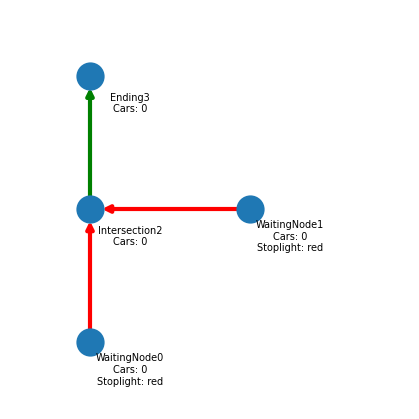

In [18]:
import matplotlib.pyplot as plt

def nudge(pos, x_shift, y_shift):
    return {n:(x + x_shift, y + y_shift) for n,(x,y) in pos.items()}

def render(G):
    edges = G.edges()
    colors = ['g' if (type(edge[0]) is WaitingNode and edge[0].stoplight == 'green') or type(edge[0]) is IntersectionNode else 'r' for edge in edges ]

    pos=nx.get_node_attributes(G,'pos')

    pos_nodes = nudge(pos, 0.25, -0.2)  

    plt.figure(1,figsize=(4,4))
    nx.draw(G, pos = pos, edge_color = colors, with_labels=False, linewidths = 3, width = 3)
    nx.draw_networkx_labels(G, pos=pos_nodes, font_size=7)

    ax = plt.gca()
    ax.set_xlim([-0.5, 2])
    ax.set_ylim([-0.5, 2.5])
    plt.show()

render(G)

## Make A green:

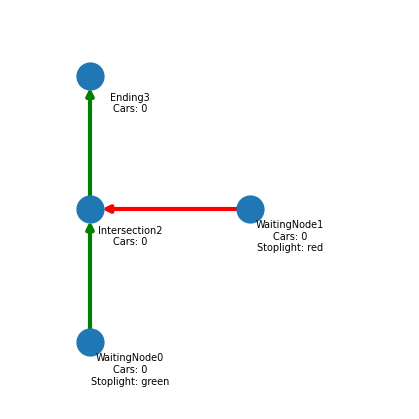

In [19]:
waiting_nodes[0].stoplight = 'green'
render(G)

## Make B green (and A red)

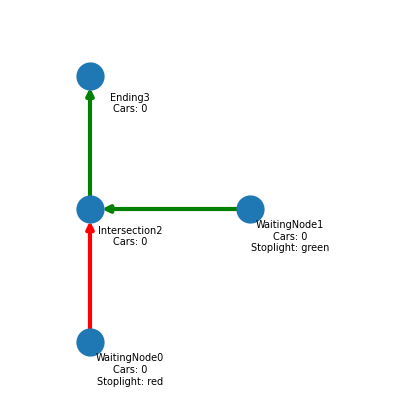

In [20]:
waiting_nodes[1].stoplight = 'green'
waiting_nodes[0].stoplight = 'red'
render(G)

# Spawn some cars in A

In [21]:
cars = []
n_cars = 10     # number of cars
now = 5         # spawning time, for example
for i in range(n_cars):
    cars.append(Car(id = i, spawn_time = now))

A.queue += cars

A.queue

[Car 0, Car 1, Car 2, Car 3, Car 4, Car 5, Car 6, Car 7, Car 8, Car 9]

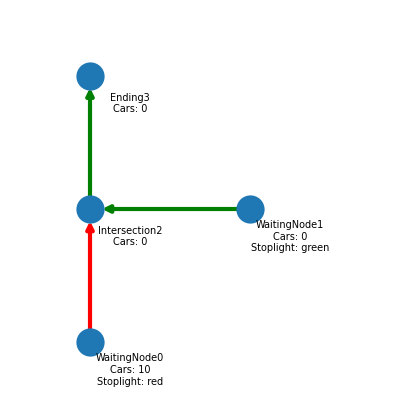

In [22]:
render(G)